In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [ ]:
y_label = le.transform(y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30)

In [ ]:
X_train.head()

,sepal length,sepal width,petal length,petal width
22,4.6,3.6,1.0,0.2
63,6.1,2.9,4.7,1.4
105,7.6,3.0,6.6,2.1
80,5.5,2.4,3.8,1.1
3,4.6,3.1,1.5,0.2


In [ ]:
y_train

array([0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1,
       0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0])

In [ ]:
y_test

array([2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1,
       1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2,
       1])

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred_gnb = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb) * 100)
print(confusion_matrix(y_test, y_pred_gnb))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.96      0.90      0.93        29
 Iris-virginica       0.89      0.96      0.93        26

       accuracy                           0.96        90
      macro avg       0.95      0.95      0.95        90
   weighted avg       0.96      0.96      0.96        90

95.55555555555556
[[35  0  0]
 [ 0 26  3]
 [ 0  1 25]]


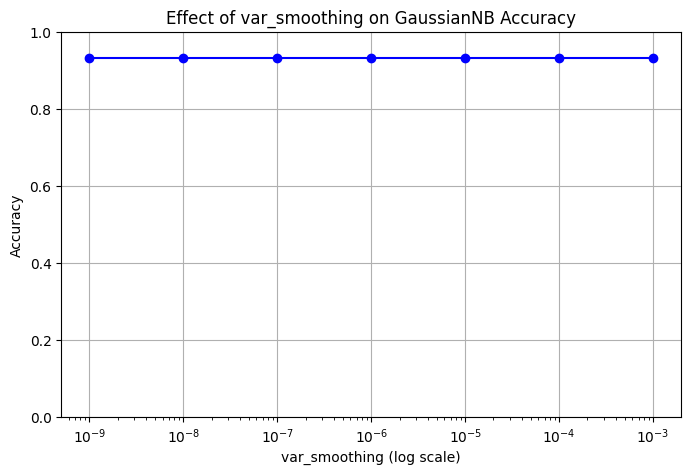

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

var_smoothing_values = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

accuracies = []

for vs in var_smoothing_values:
    model = GaussianNB(var_smoothing=vs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting line plot
plt.figure(figsize=(8,5))
plt.plot(var_smoothing_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xscale('log')
plt.xlabel('var_smoothing (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of var_smoothing on GaussianNB Accuracy')
plt.grid(True)
plt.ylim([0, 1])
plt.show()

# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_mnb = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_mnb))
print(accuracy_score(y_test, y_pred_mnb) * 100)
print(confusion_matrix(y_test, y_pred_mnb))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.41      1.00      0.58        13
           2       1.00      0.05      0.10        20

    accuracy                           0.58        45
   macro avg       0.80      0.68      0.56        45
weighted avg       0.83      0.58      0.48        45

57.77777777777777
[[12  0  0]
 [ 0 13  0]
 [ 0 19  1]]


# Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred_bnb = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_bnb))
print(accuracy_score(y_test, y_pred_bnb) * 100)
print(confusion_matrix(y_test, y_pred_bnb))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.27      1.00      0.42        12
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        20

    accuracy                           0.27        45
   macro avg       0.09      0.33      0.14        45
weighted avg       0.07      0.27      0.11        45

26.666666666666668
[[12  0  0]
 [13  0  0]
 [20  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


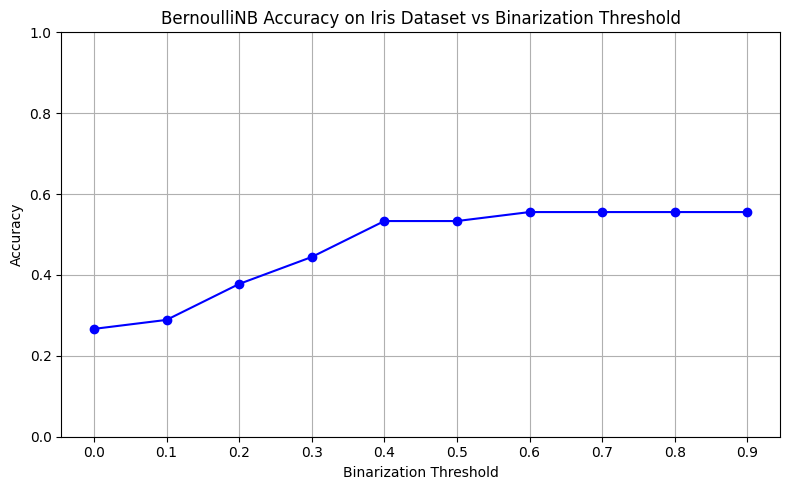

In [ ]:
binarize_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Store accuracies
accuracies = []

# Train and evaluate
for threshold in binarize_values:
    model = BernoulliNB(binarize=threshold)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(binarize_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('BernoulliNB Accuracy on Iris Dataset vs Binarization Threshold')
plt.xlabel('Binarization Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(binarize_values)
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

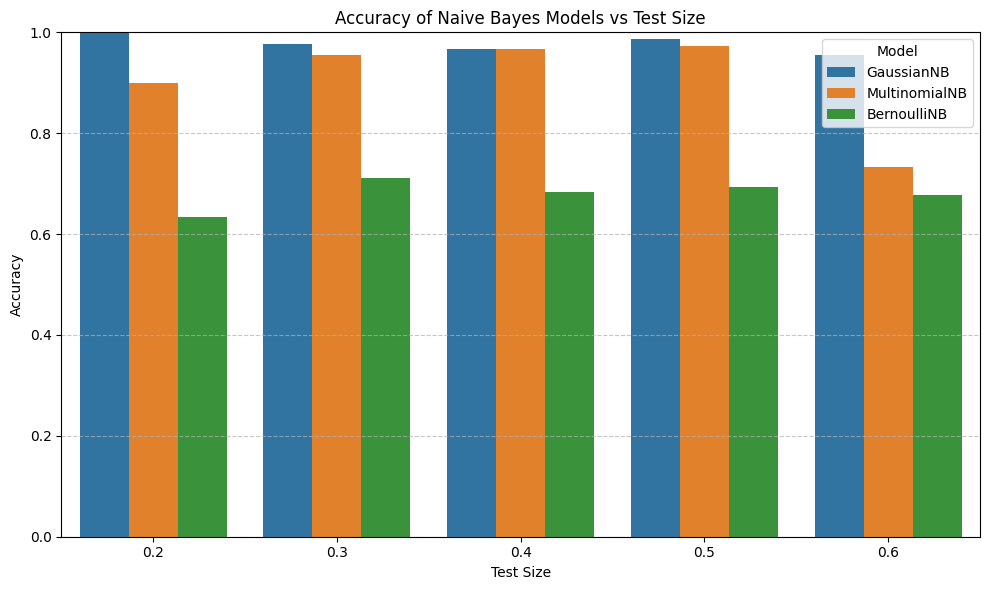

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Test sizes to evaluate
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

# Models to evaluate
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(binarize=0.6)
}

# Collect accuracy results
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Test Size': test_size,
            'Accuracy': acc
        })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Test Size', y='Accuracy', hue='Model')
plt.title('Accuracy of Naive Bayes Models vs Test Size')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt) * 100)
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.96      0.93      0.95        29
 Iris-virginica       0.93      0.96      0.94        26

       accuracy                           0.97        90
      macro avg       0.96      0.96      0.96        90
   weighted avg       0.97      0.97      0.97        90

96.66666666666667
[[35  0  0]
 [ 0 27  2]
 [ 0  1 25]]


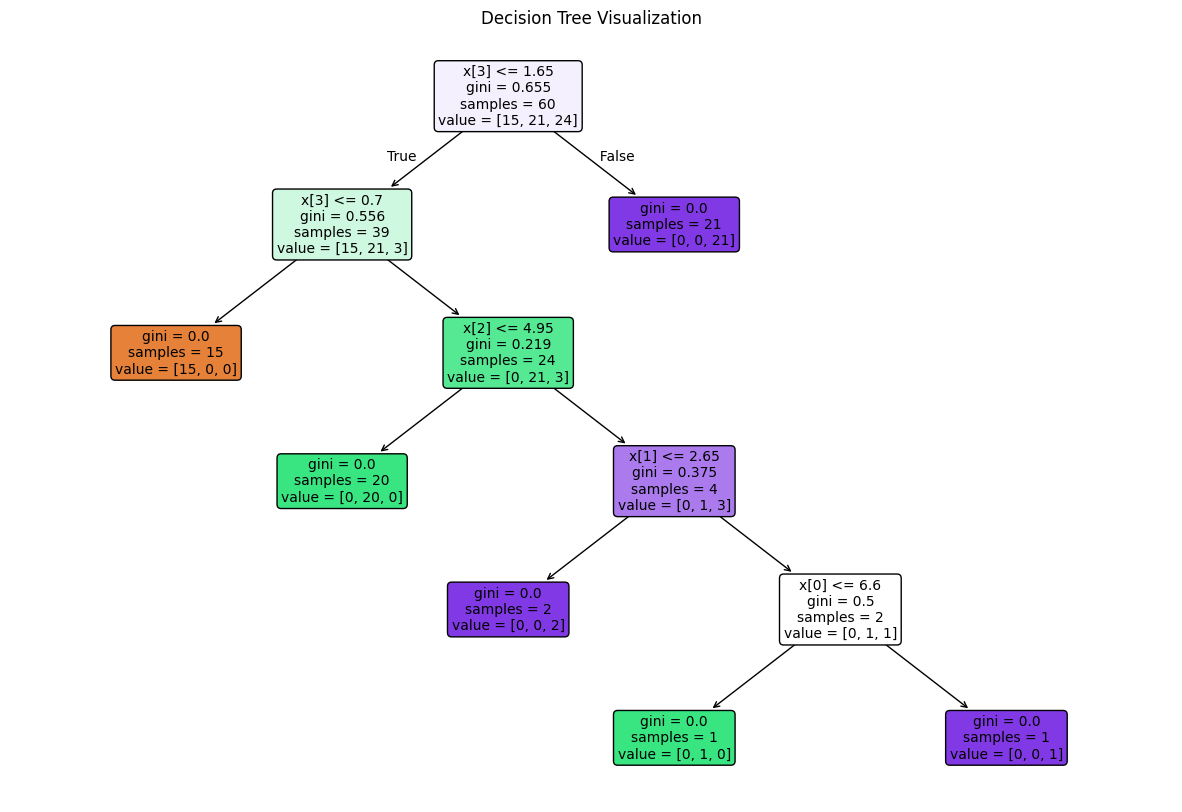

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(classifier_dt,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion="entropy")
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt) * 100)
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      0.93      0.96        29
 Iris-virginica       0.93      1.00      0.96        26

       accuracy                           0.98        90
      macro avg       0.98      0.98      0.98        90
   weighted avg       0.98      0.98      0.98        90

97.77777777777777
[[35  0  0]
 [ 0 27  2]
 [ 0  0 26]]


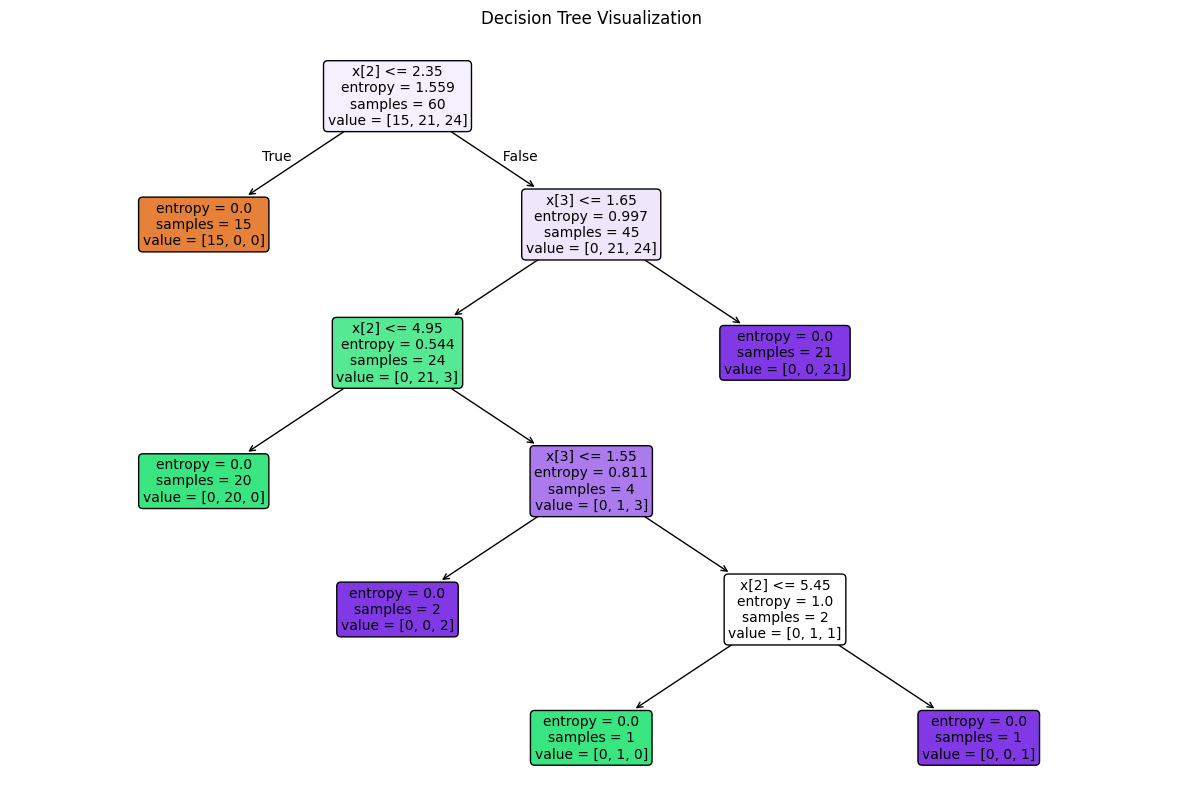

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(classifier_dt,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

#Discussion

Based on the analysis performed:

**Dataset:**

*   The Iris dataset is a classic dataset for classification tasks, containing 150 instances of iris plants with 4 features (sepal length, sepal width, petal length, and petal width) and 3 target classes (Iris-setosa, Iris-versicolor, and Iris-virginica).
*   The dataset has no missing values.
*   As noted in the metadata, one class is linearly separable, while the other two are not, which can affect the performance of different classification algorithms.

**Models and Performance:**

*   **Gaussian Naive Bayes:** This model performed well, achieving high accuracy. With a test size of 30%, the accuracy was 95.56%. The plot shows that the accuracy is consistently high across different `var_smoothing` values, reaching up to 95.56% for `var_smoothing=1e-09`.
*   **Multinomial Naive Bayes:** This model's performance was significantly lower than Gaussian Naive Bayes. With a test size of 30%, the accuracy was 57.78%. The classification report also shows poor precision and recall for Iris-versicolor and Iris-virginica. This is likely due to the nature of the data (continuous features) which is generally better suited for Gaussian Naive Bayes.
*   **Bernoulli Naive Bayes:** This model performed the worst among the three, with a low accuracy of 26.67% with a test size of 30%. This is expected as Bernoulli Naive Bayes is designed for binary data, and while binarizing the continuous features was attempted, even at the optimal binarization threshold of 0.6, the accuracy only reached approximately 55.56%.
*   **Decision Tree Classifier:** Both Decision Tree models (using 'gini' and 'entropy' criteria) performed exceptionally well, with high accuracy scores. With a test size of 30%, the model with the 'gini' criterion achieved 96.67% accuracy, and the model with the 'entropy' criterion achieved 97.78% accuracy. The decision tree visualizations show how the model makes classifications based on the features. The entropy criterion slightly outperformed the gini criterion in this case.

**Comparison and Conclusion:**

*   Gaussian Naive Bayes and Decision Tree Classifier (with both criteria) are the most suitable models for this dataset, achieving high accuracy in classifying the iris species (around 95-98%).
*   Multinomial and Bernoulli Naive Bayes are less appropriate for this dataset due to the continuous nature of the features and resulted in significantly lower accuracies (57.78% and 26.67% respectively for a 30% test size).
*   The bar plot evaluating model accuracy across different test sizes shows that Gaussian Naive Bayes consistently performs well, while Multinomial Naive Bayes and Bernoulli Naive Bayes show more variability and generally lower accuracy. For instance, with a test size of 60%, GaussianNB achieved 95.56%, MultinomialNB achieved 73.33%, and BernoulliNB achieved 67.78%.
*   The choice between Gaussian Naive Bayes and Decision Tree Classifier would depend on factors like interpretability (decision trees are generally easier to interpret) and computational cost (Naive Bayes is typically faster). For this dataset, both provide excellent results.